# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

В формулировках заданий запутаться можно и вогнать себя в тильт, честно не оч приятно

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
X_raw = data
y = data['target']
X_raw = X_raw.drop('target', axis=1)

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
cat_features_mask = (X_raw.dtypes == "object").values
cat_features_mask

array([False,  True,  True,  True])

In [7]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

# взято с семинара номер 3, группа 9

In [8]:
X_no_mis

,id,keyword,location,text
0,1.0,,,Our Deeds are the Reason of this #earthquake M...
1,4.0,,,Forest fire near La Ronge Sask. Canada
2,5.0,,,All residents asked to 'shelter in place' are ...
3,6.0,,,"13,000 people receive #wildfires evacuation or..."
4,7.0,,,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869.0,,,Two giant cranes holding a bridge collapse int...
7609,10870.0,,,@aria_ahrary @TheTawniest The out of control w...
7610,10871.0,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872.0,,,Police investigating after an e-bike collided ...


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [9]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
X_no_mis.isna().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [11]:
X = pd.concat((X_no_mis, y), axis = 1)
X

,id,keyword,location,text,target
0,1.0,,,Our Deeds are the Reason of this #earthquake M...,1
1,4.0,,,Forest fire near La Ronge Sask. Canada,1
2,5.0,,,All residents asked to 'shelter in place' are ...,1
3,6.0,,,"13,000 people receive #wildfires evacuation or...",1
4,7.0,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869.0,,,Two giant cranes holding a bridge collapse int...,1
7609,10870.0,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871.0,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872.0,,,Police investigating after an e-bike collided ...,1


In [12]:
X = X.drop('id', axis = 1)
X

,keyword,location,text,target
0,,,Our Deeds are the Reason of this #earthquake M...,1
1,,,Forest fire near La Ronge Sask. Canada,1
2,,,All residents asked to 'shelter in place' are ...,1
3,,,"13,000 people receive #wildfires evacuation or...",1
4,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,,,Two giant cranes holding a bridge collapse int...,1
7609,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,,,Police investigating after an e-bike collided ...,1


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(X, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

<AxesSubplot:xlabel='target', ylabel='Count'>

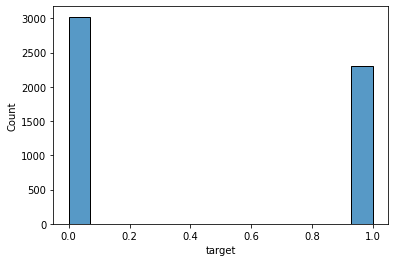

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x = 'target', data = train)

In [15]:
print(train['keyword'].value_counts()[:11])

              44
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
fatality      30
Name: keyword, dtype: int64


In [16]:
keyword_most_pop = [
    'damage', 'siren',         
    'wreckage', 'fatalities',
    'deluge', 'refugees',
    'derail', 'fear',       
    'tsunami', 'fatality'  
                    ]
X_filter = train['keyword'].isin(keyword_most_pop)


In [17]:
import numpy as np 

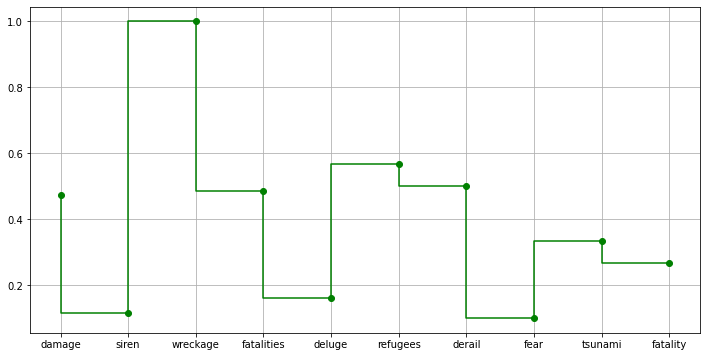

In [18]:
pr = train[X_filter]
a = np.zeros(10)
for i, item in enumerate(keyword_most_pop):
    if1 = pr['keyword'] == item
    if2 = pr['target'] == 1
    a[i] = len(pr[if1 & if2])/len(pr[if1])

fig, ax = plt.subplots(figsize=(12, 6))
ax.step(keyword_most_pop, a, "g-o", where = 'pre')
ax.grid()

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [19]:
train

,keyword,location,text,target
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,rioting,,Still rioting in a couple of hours left until ...,1
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...
5226,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,panic,,just had a panic attack bc I don't have enough...,0
860,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,,,Officials say a quarantine is in place at an A...,1


In [20]:
a = train['keyword'] + ' '+  train['location'] + ' ' + train['text']
a = pd.DataFrame(a, columns = ['letters'])
a

,letters
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,police Houston CNN: Tennessee movie theater s...
5787,rioting Still rioting in a couple of hours le...
7445,wounds Lake Highlands Crack in the path where ...
...,...
5226,obliteration Merica! @Eganator2000 There aren'...
5390,panic just had a panic attack bc I don't have...
860,blood Omron HEM-712C Automatic Blood Pressure...
7603,Officials say a quarantine is in place at an...


In [21]:
train_new = pd.concat([a, train['target']], axis = 1)
train_new

,letters,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


In [22]:
from nltk.tokenize import word_tokenize

In [23]:
#train_new['letters'] = train_new.apply(lambda x: word_tokenize(x['letters']), axis=1)
#train_new['letters'] = train_new.apply(lambda x: ' '.join(x['letters']), axis=1)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()

In [25]:
voc = cnt_vec.fit_transform((train_new['letters']))
voc.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [26]:
cnt_vec.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [27]:
text = cnt_vec.vocabulary_
a = []
for key in text.keys():
    a.append(key)
text = " ".join(a)

In [28]:
from string import punctuation as punc
num = ['0','1','2','3','4','5','6','7','8','9']

In [29]:
def punc_in_voc(text):
    a = []
    for i in range(len(punc)):
        for word in text.split():
            for char in word:
                if char == punc[i]:
                    a.append(word)
                    break
    return a

In [30]:
def num_in_voc(text):
    a = []
    for i in range(len(num)):
        for word in text.split():
            for char in word:
                if char.isdigit():
                    a.append(word)
                    break
    return a

In [31]:
import re

In [32]:
tags = re.findall(r'(#\w+)', text)
len(tags)


0

In [33]:
tags = re.findall(r'(@\w+)', text)
len(tags)

0

In [34]:
list1 = punc_in_voc(text)
len(list1)

315

In [35]:
list2 = num_in_voc(text)


In [36]:
len(list2)

38120

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [37]:
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer


In [38]:
tw = TweetTokenizer()
cnt_vec1 = CountVectorizer(tokenizer=tw.tokenize)



In [39]:
cnt_vec1.fit_transform((train_new['letters']))

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [40]:
cnt_vec1.vocabulary_

{'bridge': 5275,
 '%': 1472,
 '20collapse': 1800,
 'ashes': 4530,
 '2015': 1773,
 ':': 2229,
 'australia': 4628,
 '\x89': 19587,
 'ûªs': 19640,
 'collapse': 6032,
 'at': 4567,
 'trent': 18450,
 'among': 4300,
 'worst': 19368,
 'in': 12552,
 'history': 8949,
 'england': 7415,
 'bundled': 5388,
 'out': 14999,
 'for': 8041,
 '60': 2077,
 '...': 1512,
 'http://t.co/t5trhjuau0': 11456,
 'hail': 8661,
 'carol': 5600,
 'stream': 17648,
 ',': 1483,
 'illinois': 12503,
 'great': 8518,
 'michigan': 14071,
 'technique': 18025,
 'camp': 5510,
 'b1g': 4691,
 'thanks': 18124,
 'to': 18284,
 '@bmurph1019': 2490,
 '@hail_youtsey': 2905,
 '.': 1509,
 '@termn8r13': 3718,
 '#goblue': 520,
 '#wrestleon': 1442,
 'http://t.co/oaskgki6qj': 10996,
 'police': 15494,
 'houston': 9082,
 'cnn': 5982,
 'tennessee': 18063,
 'movie': 14348,
 'theater': 18131,
 'shooting': 17007,
 'suspect': 17851,
 'killed': 13124,
 'by': 5442,
 'http://t.co/di8elzswnr': 9897,
 'rioting': 16377,
 'still': 17597,
 'a': 3943,
 'couple

In [41]:
text1 = cnt_vec1.vocabulary_
a = []
for key in text1.keys():
    a.append(key)
text1= " ".join(a)

In [42]:
list1 = punc_in_voc(text1)
len(list1)

14207

In [43]:
list2 = num_in_voc(text1)
len(list2)

39410

In [44]:
tags = re.findall(r'(#\w+)', text1)
len(tags)

1469

In [45]:
tags = re.findall(r'(@\w+)', text1)
len(tags)

1684

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [46]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stem = SnowballStemmer('english')
noise = list(punc) + stopwords.words('english')


In [47]:
def tok(text):
    text = text.lower()
    text = re.sub(r"[^\x00-\x7F]", "", text)
    text = tw.tokenize(text)
    text = [w for w in text if not w in noise]
    text = [stem.stem(w) for w in text]
    text = " ".join(text)
    return text


In [48]:
for i in range(10):
    print(tok(train_new['letters'][i:i+1].to_string(index = False)))


bridg 20collaps ash 2015 australia co ...
hail carol stream illinoi great michigan tech ...
polic houston cnn tennesse movi theater sh ...
riot still riot coupl hour lef ...
wound lake highland crack path ...
airplan 20accid somewher expert ...
bloodi isol citi world perth came ...
burn @johnsontionn except idk ...
destroy ask destroy hous
wound maracay nirgua venezuela polic offi ...


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [49]:
a = test['keyword'] + ' '+ test['location'] + ' '+ test['text']
a = pd.DataFrame(a, columns = ['letters'])
test_new = pd.concat([a, test['target']], axis = 1)
test_new

,letters,target
2644,destruction So you have a new weapon that can...,1
2227,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,police UK DT @georgegalloway: RT @Galloway4May...,1
132,aftershock Aftershock back to school kick off...,0
6845,"trauma Montgomery County, MD in response to tr...",0
...,...,...
4307,"hellfire 570 Vanderbilt; Brooklyn, NY New cock...",0
3375,evacuation USA Bend Post Office roofers cut ga...,1
1710,collided Monsoon flooding - Monsoon rains hav...,1
4898,massacre Ireland Remember this was a massacre ...,1


In [50]:
cnt_vec2 = CountVectorizer(tokenizer=tok)
text_train_bow = cnt_vec2.fit_transform(train_new['letters'])
text_test_bow = cnt_vec2.transform(test_new['letters'])

In [51]:
text_train_bow, text_test_bow

(<5329x57 sparse matrix of type '<class 'numpy.int64'>'
 	with 132621 stored elements in Compressed Sparse Row format>,
 <2284x57 sparse matrix of type '<class 'numpy.int64'>'
 	with 56663 stored elements in Compressed Sparse Row format>)

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [72]:
lr1 = SGDClassifier()
lr1.fit(text_train_bow, train_new['target'] )
y_predict = lr1.predict(text_test_bow)
print("accuracy:", accuracy_score(test_new["target"], y_predict))
print("f1_score:", f1_score(test_new["target"], y_predict))

accuracy: 0.6611208406304728
f1_score: 0.6046986721144024


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=tok)

In [55]:
text_train_tf = tfidf_vec.fit_transform(train_new['letters'])
text_test_tf = tfidf_vec.transform(test_new['letters'])

In [56]:
text_train_tf, text_test_tf 

(<5329x57 sparse matrix of type '<class 'numpy.float64'>'
 	with 132621 stored elements in Compressed Sparse Row format>,
 <2284x57 sparse matrix of type '<class 'numpy.float64'>'
 	with 56663 stored elements in Compressed Sparse Row format>)

In [57]:
lr2 = SGDClassifier()
lr2.fit(text_train_tf, train_new['target'])
y_predict_1 = lr2.predict(text_test_tf)
print("accuracy:", accuracy_score(test_new["target"], y_predict_1))
print("f1_score:", f1_score(test_new["target"], y_predict_1))

accuracy: 0.6427320490367776
f1_score: 0.6229205175600739


Качество улучшилось

In [58]:
tfidf_vec2 = TfidfVectorizer(tokenizer=tok, max_df= 0.9)

In [59]:
text_train_tf2 = tfidf_vec2.fit_transform(train_new['letters'])
text_test_tf2 = tfidf_vec2.transform(test_new['letters'])

In [60]:
text_train_tf2, text_test_tf2

(<5329x45 sparse matrix of type '<class 'numpy.float64'>'
 	with 71324 stored elements in Compressed Sparse Row format>,
 <2284x45 sparse matrix of type '<class 'numpy.float64'>'
 	with 30416 stored elements in Compressed Sparse Row format>)

размеры матрицы уменьшились 

In [81]:
lr2 = SGDClassifier()
lr2.fit(text_train_tf2, train_new['target'])
y_predict_2 = lr2.predict(text_test_tf2)
print("accuracy:", accuracy_score(test_new["target"], y_predict_2))
print("f1_score:", f1_score(test_new["target"], y_predict_2))

accuracy: 0.6252189141856392
f1_score: 0.5040556199304751


качество стало хуже, f1_score уменьшился

In [62]:
tfidf_vec3 = TfidfVectorizer(tokenizer=tok, max_df= 0.9, min_df = 0.3)

In [63]:
text_train_tf3 = tfidf_vec3.fit_transform(train_new['letters'])
text_test_tf3 = tfidf_vec3.transform(test_new['letters'])

In [64]:
text_train_tf3, text_test_tf3

(<5329x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 57997 stored elements in Compressed Sparse Row format>,
 <2284x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 24754 stored elements in Compressed Sparse Row format>)

In [65]:
lr3 = SGDClassifier()
lr3.fit(text_train_tf3, train_new['target'])
y_predict_3 = lr3.predict(text_test_tf3)
print("accuracy:", accuracy_score(test_new["target"], y_predict_3))
print("f1_score:", f1_score(test_new["target"], y_predict_3))

accuracy: 0.6295971978984238
f1_score: 0.5877192982456141


качество на всех +- одинаковое, большого улучшения скорее всего можно добиться только доп анализом

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [66]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(n_features = 5000)

In [67]:
hash_vec = HashingVectorizer(n_features = 5000, tokenizer= tok)
text_train_hash = hash_vec.fit_transform(train_new['letters'])
text_test_hash = hash_vec.transform(test_new['letters'])

/Users/kirill/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [68]:
lr = SGDClassifier()
lr.fit(text_train_hash, train_new['target'])
y_predict = lr.predict(text_test_hash)
print("accuracy:", accuracy_score(test_new["target"], y_predict))
print("f1_score:", f1_score(test_new["target"], y_predict))

accuracy: 0.6501751313485113
f1_score: 0.5384170999422299


Hash показал ниже на какую-то тысячную, вариант, что все не улучшает меру - обработаны плохо данные, порезаны окончания слов

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [69]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

In [122]:
tfidf_vec_ex = TfidfVectorizer(tokenizer=tok, max_df= 0.8)
text_train_tf3 = tfidf_vec_ex.fit_transform(train_new['letters'])
text_test_tf3 = tfidf_vec_ex.transform(test_new['letters'])






In [145]:
lr = SGDClassifier()
lr.fit(text_train_tf3, train_new['target'])
y_predict_3 = lr.predict(text_test_tf3)
print("accuracy:", accuracy_score(test_new["target"], y_predict_3))
print("f1_score:", f1_score(test_new["target"], y_predict_3))

accuracy: 0.6169001751313485
f1_score: 0.6337379656760151


мммм